In [1]:
# imports for graphic display
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as colors
import cmocean as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# imports for data manipulation
import numpy as np
import xarray as xr
from salishsea_tools import viz_tools, utilities
import numpy.ma as ma
import datetime

# basic computations
from scipy import stats


In [2]:
AKNS = xr.open_dataset('/Users/rmueller/Projects/MIDOSS/results/MediumFloater/stokes_test/Graham/Lagrangian_AKNS_crude_SOG_05jun15_12jun15_MediumFloater_AKNS_1000m3_stokestest.nc')

In [3]:
AKNS


<xarray.Dataset>
Dimensions:              (grid_x: 396, grid_y: 896, grid_z: 40, time: 48)
Coordinates:
  * time                 (time) datetime64[ns] 2015-06-05T00:30:00 ... 2015-06-06T23:30:00
  * grid_y               (grid_y) int16 0 1 2 3 4 5 ... 890 891 892 893 894 895
  * grid_x               (grid_x) int16 0 1 2 3 4 5 ... 390 391 392 393 394 395
  * grid_z               (grid_z) int16 0 1 2 3 4 5 6 7 ... 33 34 35 36 37 38 39
Data variables:
    OilConcentration_2D  (time, grid_y, grid_x) float64 ...
    Thickness_2D         (time, grid_y, grid_x) float64 ...
    Dissolution_3D       (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Beaching_Time        (grid_y, grid_x) datetime64[ns] ...
    Oil_Arrival_Time     (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Mon Sep 23 17:31:08 2019: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    h

In [4]:
grid_z = np.arange(0,2,1)
grid_z
AKNS_conc_depth_t = np.zeros((40,896,396))

In [26]:
AKNS_conc_surf = AKNS.OilConcentration_3D[:,39,:,:]
AKNS_conc_surf_t = AKNS_conc_surf.sum(dim='time')

AKNS_conc_bot = AKNS.OilConcentration_3D[:,0,:,:]
AKNS_conc_bot_t = AKNS_conc_bot.sum(dim='time')


#for z in grid_z:
#    z
#    AKNS_conc_depth = AKNS.OilConcentration_3D[:,z,:,:]
#    AKNS_conc_depth_t[z,:,:] = AKNS_conc_depth.sum(dim='time')    

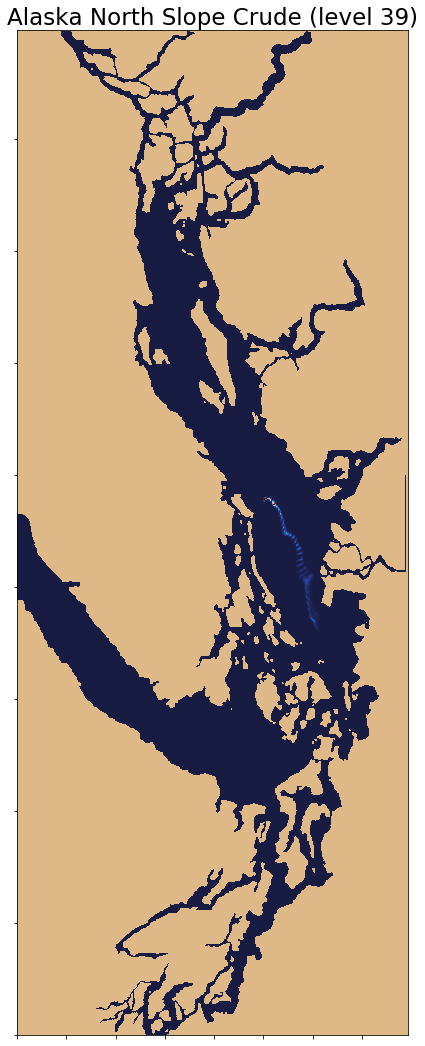

In [27]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(AKNS_conc_surf_t.values, vmin = 0, vmax = 5, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# remove axis labelsand add titles for AKNS graphic
viz_tools.set_aspect(ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#ax1.set_ylabel('test', fontsize = 20)
ax1.set_title('Alaska North Slope Crude (level 39)', fontsize = 23)

# adjust colorbar for AKNS graphic
divider = make_axes_locatable(ax1)
c1 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c1)
cb.set_label('Concentration summed over time', fontsize=20)
cb.ax.tick_params(labelsize = 20)
cb.remove()

#viz_tools.plot_coastline

plt.savefig('./AKNS_SurfConc_stokes_test.jpeg',format='jpeg', dpi=500)

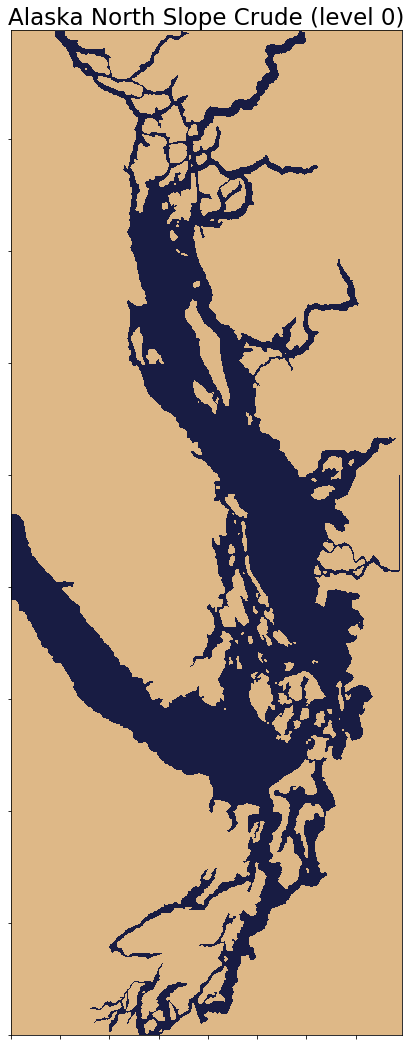

In [28]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
# convert xarray into numpy using ".values" in order to gain access to different visualization tools
mappable = ax1.pcolormesh(AKNS_conc_bot_t.values, vmin = 0, vmax = 5, cmap = cm.cm.balance)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(ax1,'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# remove axis labelsand add titles for AKNS graphic
viz_tools.set_aspect(ax1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
#ax1.set_ylabel('test', fontsize = 20)
ax1.set_title('Alaska North Slope Crude (level 0)', fontsize = 23)

# adjust colorbar for AKNS graphic
divider = make_axes_locatable(ax1)
c1 = divider.append_axes("right", size = '10%', pad = .25)
cb = plt.colorbar(mappable, cax = c1)
cb.set_label('Concentration summed over time', fontsize=20)
cb.ax.tick_params(labelsize = 20)
cb.remove()

#viz_tools.plot_coastline

plt.savefig('./AKNS_botConc_stokes_test.jpeg',format='jpeg', dpi=500)